In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, geom

In [2]:
df_walmart = pd.read_csv("E:\Statistical Testing\walmart_data.csv")

In [3]:
df_walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df_walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df_walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

The dataset contains 550068 rows , 10 columns , basically the dataset contains 550068 transaction data . There are no missing values in the data . The mean and median of product category are nearly same , Mean and median of Occupation have a difference of nearly 1 value , Mean and median of purchase have a difference of nearly 1000 . Occupation , product category and purchase have a max higher than 75 percentile which means they have outliers .

In [7]:
df_walmart[["Gender"]].value_counts()

Gender
M         414259
F         135809
dtype: int64

In [28]:
df_walmart[["Gender"]].value_counts(normalize=True)*100

Gender
M         75.310507
F         24.689493
dtype: float64

Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

In [8]:
df_walmart["Product_Category"].value_counts().sort_values(ascending=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [9]:
df_walmart["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [52]:
df_walmart["City_Category"].value_counts(normalize=True) * 100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

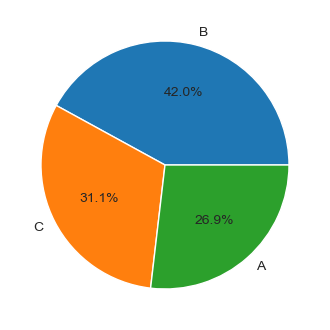

In [60]:
plt.figure(figsize=(4,6))
labels = df_walmart["City_Category"].value_counts().index
values = df_walmart["City_Category"].value_counts(normalize=True) * 100

# Plot
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.

In [11]:
df_walmart[["Occupation"]].value_counts().sort_values(ascending=False)

Occupation
4             72308
0             69638
7             59133
1             47426
17            40043
20            33562
12            31179
14            27309
2             26588
16            25371
6             20355
3             17650
10            12930
5             12177
15            12165
11            11586
19             8461
13             7728
18             6622
9              6291
8              1546
dtype: int64

We can observe that occupation less than 7 have more transactions and they are mostly from city category B. 
We can clearly see more than 40% of the transactions are from city category B. 
26% of transactions are from City category A, 42% from City category B, 31% from City category C.

In [12]:
df_walmart["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [37]:
df_walmart["Age"].sort_values(ascending=False).value_counts(normalize=True) * 100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

60% of purchases are made by people between the ages of 26 and 45

In [13]:
df_walmart.groupby("Age")["User_ID"].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [71]:
df_gender_revenue = df_walmart.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


In [14]:
df_walmart.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5340\2592124823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_walmart.groupby("Gender").mean()["Purchase"].plot(kind="bar")


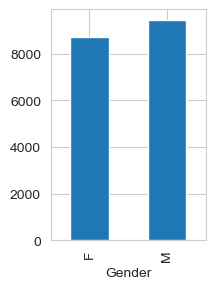

In [67]:
plt.figure(figsize=(2,3))
df_walmart.groupby("Gender").mean()["Purchase"].plot(kind="bar")
plt.show()

Females spent less than Males

In [15]:
df_walmart["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [16]:
df_walmart[["Product_ID"]].nunique()

Product_ID    3631
dtype: int64

In [17]:
df_walmart[["User_ID"]].nunique()

User_ID    5891
dtype: int64

In [18]:
df_walmart.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [19]:
df_walmart.groupby("Stay_In_Current_City_Years")["User_ID"].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years'>

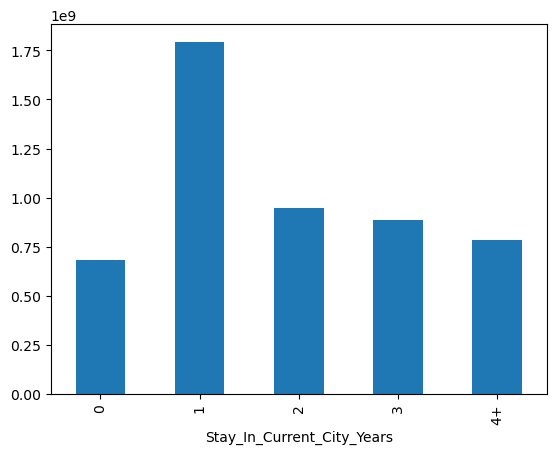

In [20]:
df_walmart.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind = "bar")

<function matplotlib.pyplot.show(close=None, block=None)>

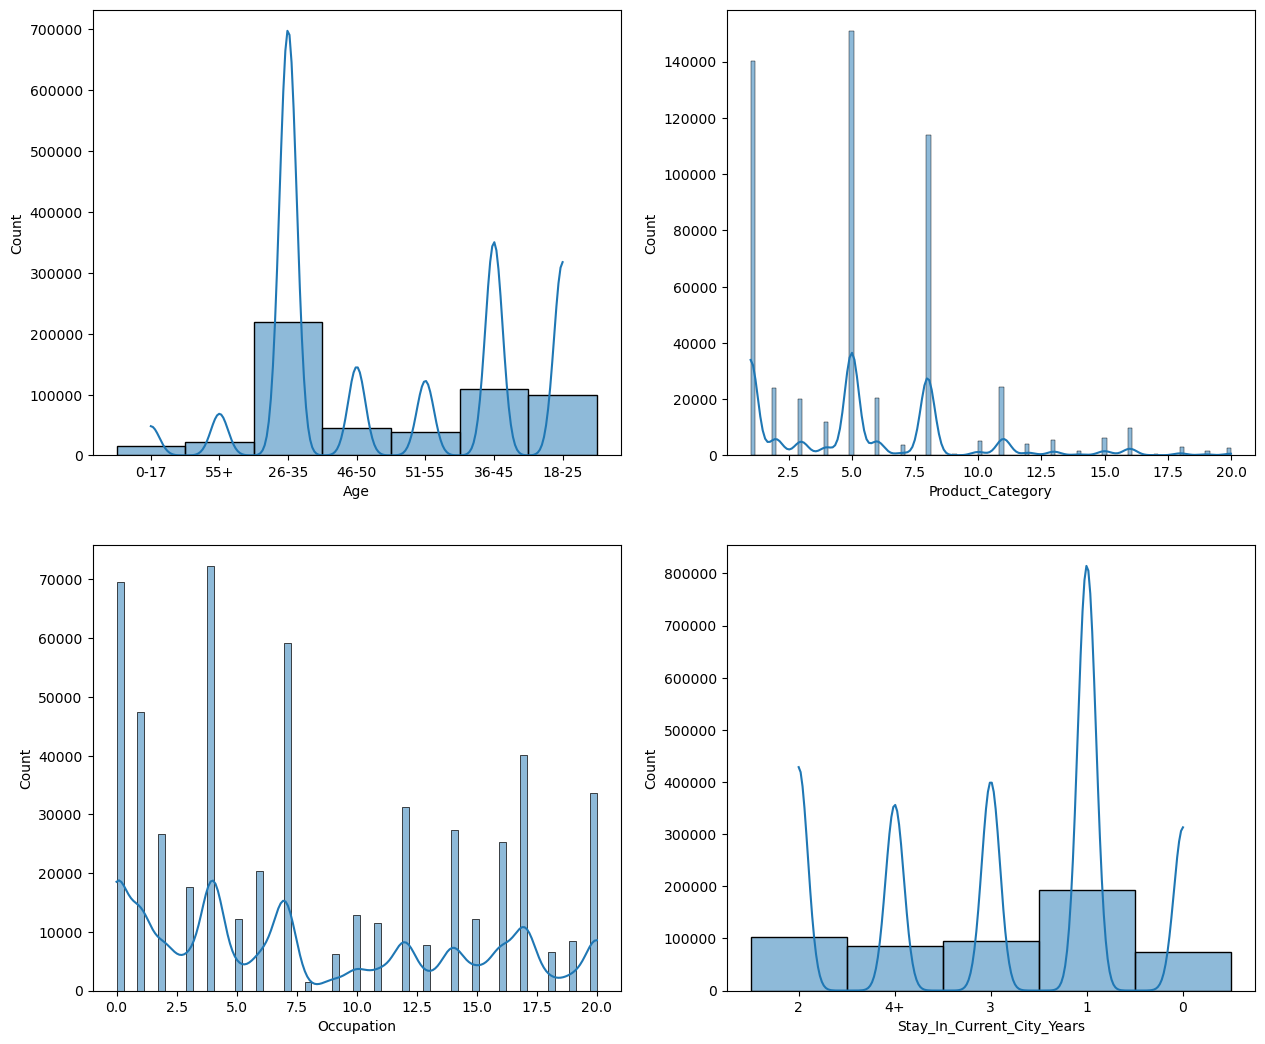

In [21]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize =(15,9))
fig.subplots_adjust(top=1.2)

sns.histplot(data =df_walmart , x ='Age', kde = True , ax =axis[0,0] )
sns.histplot(data =df_walmart , x ='Occupation', kde = True , ax =axis[1,0] )
sns.histplot(data =df_walmart , x ='Product_Category', kde = True , ax =axis[0,1] )
sns.histplot(data =df_walmart , x ='Stay_In_Current_City_Years', kde = True , ax =axis[1,1] )
plt.show

<Axes: xlabel='Marital_Status', ylabel='count'>

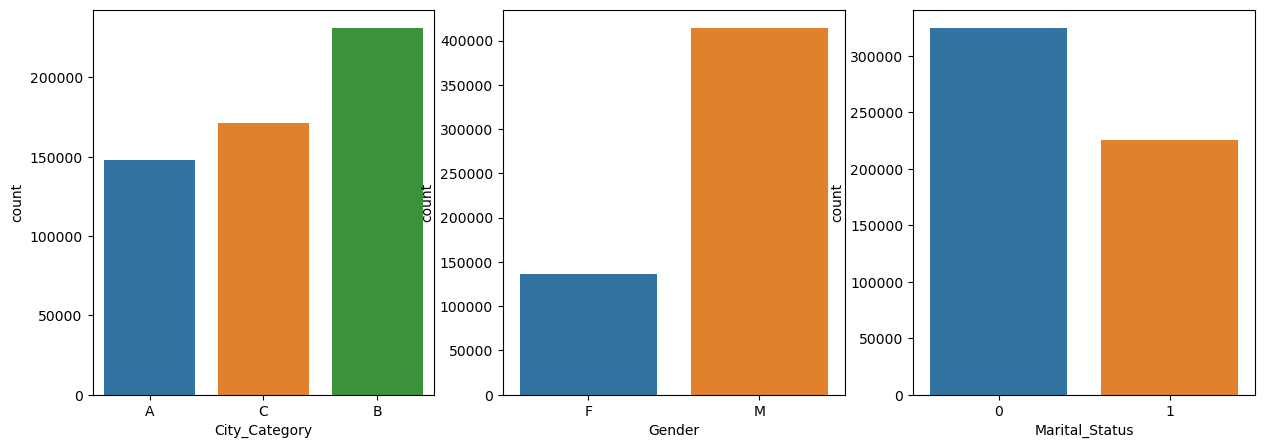

In [22]:
fig , axis = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,5))

sns.countplot(data =df_walmart , x ='City_Category',  ax =axis[0])
sns.countplot(data =df_walmart , x ='Gender',  ax =axis[1])
sns.countplot(data =df_walmart , x ='Marital_Status',  ax =axis[2])

<Axes: xlabel='Gender', ylabel='Purchase'>

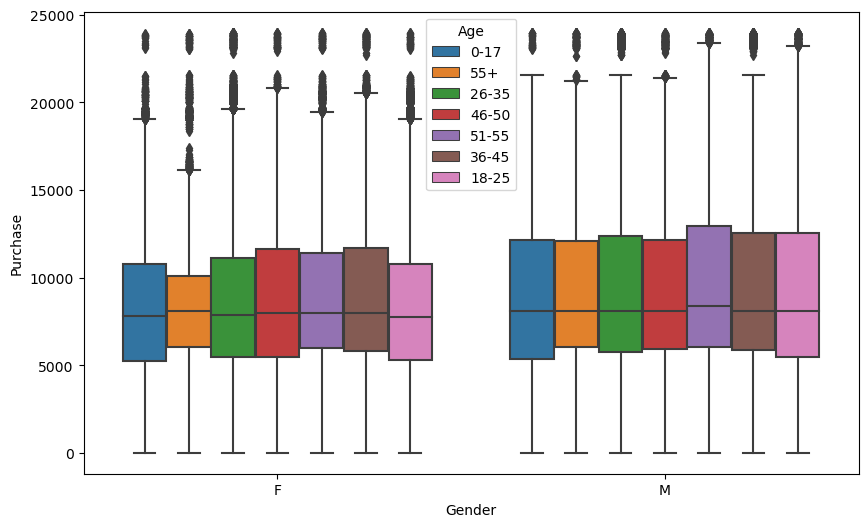

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_walmart,x="Gender", y="Purchase", hue="Age")

<Axes: xlabel='City_Category', ylabel='Purchase'>

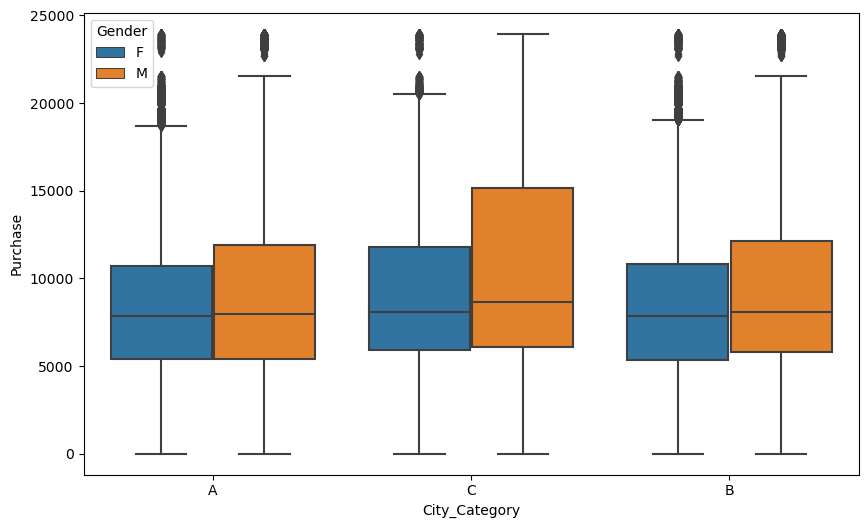

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_walmart, y="Purchase", x="City_Category", hue="Gender")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

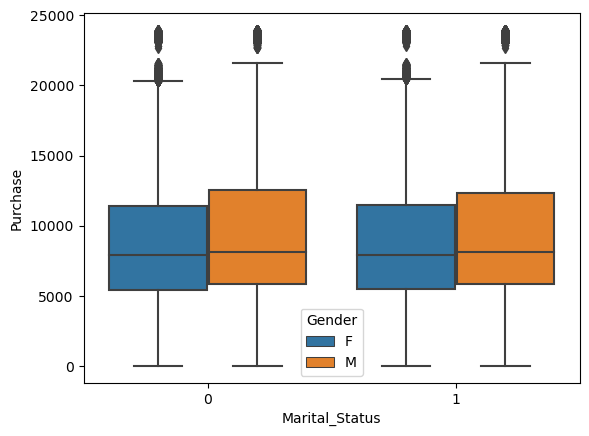

In [25]:
sns.boxplot(data=df_walmart, y="Purchase", x="Marital_Status", hue="Gender")

<Axes: xlabel='Age', ylabel='count'>

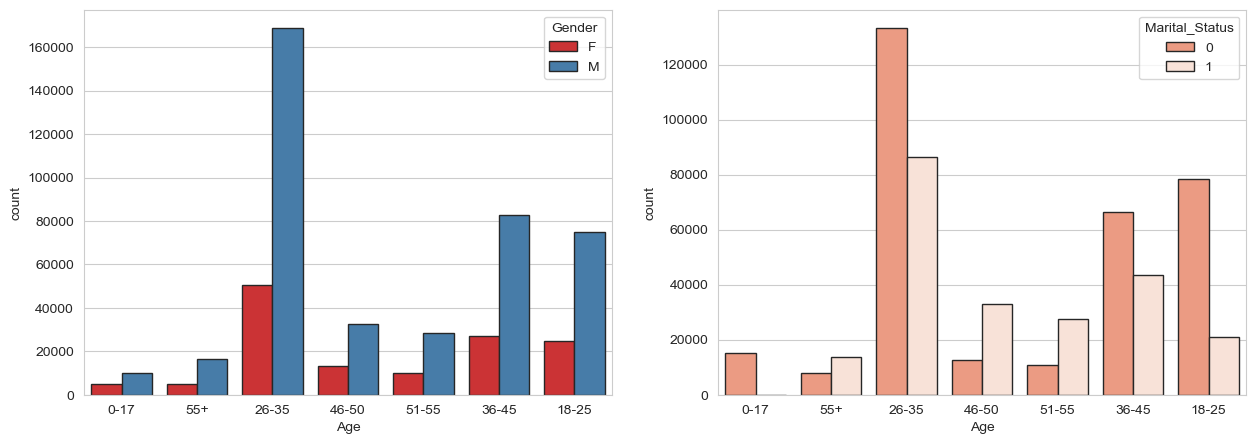

In [29]:
sns.set_style("whitegrid")

fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
sns.countplot(data=df_walmart , x ='Age',hue = "Gender" ,edgecolor="0.15", palette='Set1', ax =axis[0])
sns.countplot(data=df_walmart , x ='Age', hue = "Marital_Status",edgecolor="0.15", palette=["#fc9272","#fee0d2"] , ax =axis[1])

<Axes: xlabel='Purchase'>

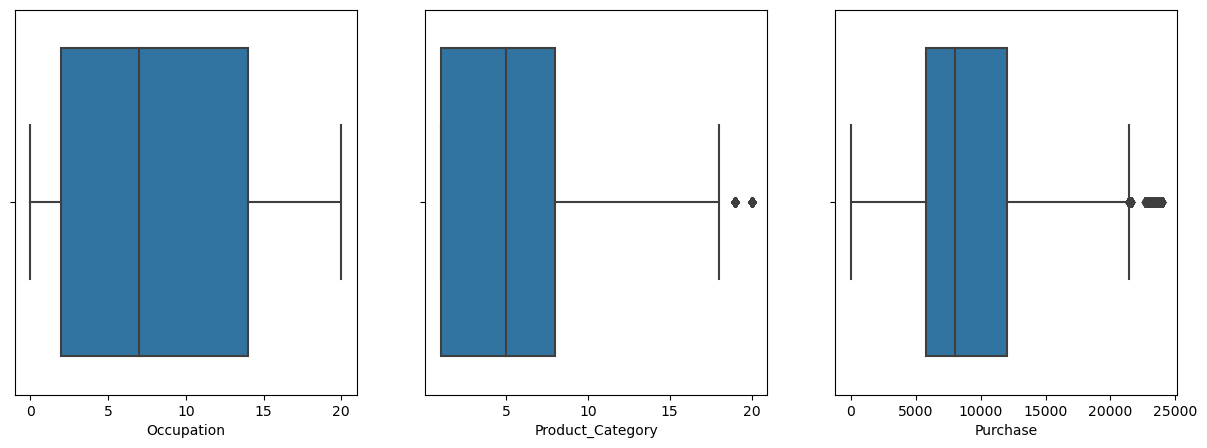

In [26]:
fig , axis = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,5))
sns.boxplot(data =df_walmart , x ='Occupation',  ax =axis[0])
sns.boxplot(data =df_walmart , x ='Product_Category',  ax =axis[1])
sns.boxplot(data =df_walmart , x ='Purchase',  ax =axis[2])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5340\1853043295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_walmart.corr(),annot= True)


<function matplotlib.pyplot.show(close=None, block=None)>

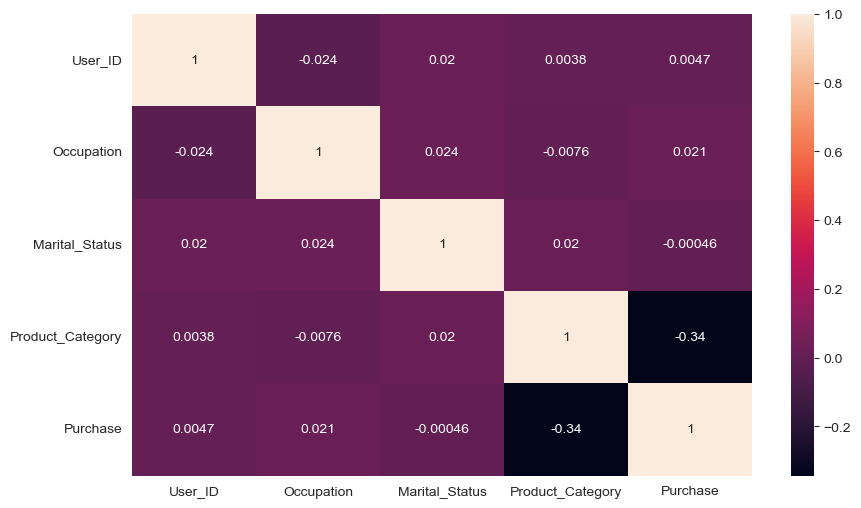

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df_walmart.corr(),annot= True)
plt.show

# Insights


The dataset contains 550068 rows , 10 columns , basically the dataset contains 550068 transaction data . There are no missing values in the data . 

The mean and median of product category are nearly same , Mean and median of Occupation have a difference of nearly 1 value , Mean and median of purchase have a difference of nearly 1000 . 

Occupation , product category and purchase have a max higher than 75 percentile which means they have outliers . 

Total number of transactions done by Males is 414259 and by females is 135809. 

Total number of transactions done by Singles is 324731 and by Partnered people is 225337. 

There are a total of 20 product categories among them categories 5,1,8 have Top 3 number of transactions . 

There are a total of 3631 product_id’s and 5891 user_id’s. 

Total 3 City_Categories A has 147720 , B has 231173 , C has 171175 transactions with Category B as top. 

Total number of Male Unique User_ID’s are 4225 and the total number of Fe-male Unique User_ID’s are 1666, where it shows male customers are more than female . 

Product category 1 has the highest purchase with 37.48% form over all purchase. 

The highest number of customers between the ages 26-35 and lowest are between 0-17. 

Most customers have stayed in the city for one year. 

Single people with age between 26-35 have contributed the highest number of transactions, even partnered people between 26-35 have the highest number of transactions among partnered but not as high as single people. 

Males have a domination over the number of transactions We can observe that occupation less than 7 have more transactions and they are mostly from city category B. We can clearly see more than 40% of the transactions are from city category B. 26% of transactions are from City category A, 42% from City category B, 31% from City category C. 

In box plot we can observe that product category and Purchases More number of transactions are of purchase between 5000 to 10000 and product category 13&1 have purchase higher than 10000.

There is not much fluctuation in median’s of male and female with regard to purchasing in marital status and Stay_In_Current_City_Years but Median of city category “C” is slightly higher in both males and females also males with age group 51-55 , females with age group 55+ have slightly higher Median. 

# Recommendations:

We can clearly see that Males and Singles have dominated in the aspect of number of transactions , so adding items that match with usage of each other by placing that combination products at immediate shelfs can increase the sales from Males and singles.

For females and Partnered customers , to increase the number of transactions , which also means the number of times they visit to walmart to shop , installing babycare facility for customers , play zone for kids and also foods like snacks and beverage will help to attract customers to spend time in walmart as usually taking care of kids during shopping always seem a burden , also with food available it becomes a chill spot after shopping. 

People who are young and middle aged seem to do more shopping , to improve the transactions in remaining age category like old age people 45 and above years , special billing lines could help as there would be less waiting time , less standing in line , hence old age employee friendly. 

Product categories that have low transactions like 14,17,9 can be considered as less used items , which can be stocked in low quantities and Product categories that have high transactions like 5,1,3 have high usage , hence have to be restocked frequently . 

City category A has very low transactions which can be improved by creating Seasonal offers and digital marketing , alsohome delivery on a minimum spend. 

Occupation more than 7 have very low number of transaction frequency , where we can assume as the occupation rate increases free time may decrease to do live shopping, hence adapting a local e-commerce app or website , where the customers add items to their cart and pay the bill with additional delivery fee and the items can be delivered to home with in 1 day. 

Products with cost range of 500 to 10000 have more transactions which can be considered as frequently used items , these items are to be restocked frequently and creating a combo with one item that has high transactions and other has low transactions may help in boosting the lower transaction item sales. 

The range of purchase in city category “C” is higher compared to other categories, decreasing the offers in this area and investing it in other two city categories in the form of discounts would make a change in income generated without any new investment. 

In both males and females old aged people have higher median and range in purchase , which means even though there are less transactions , these people tend to buy high cost products , so to increase these further more , implementing Ideas like rearranging selected products by targeting these customers with a separate billing line can help a lot.